In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)


# Neural Network with Three Hidden Layers



The number of neurons in the input layer matches the number of input features.
In this case, the dataset 'FanSpeedDS' has 5 features, so the input layer has 5 neurons.

The network contains three hidden layers with the following neuron configuration:
- Hidden Layer 1 → 32 neurons
- Hidden Layer 2 → 64 neurons
- Hidden Layer 3 → 32 neurons

The output layer has 4 neurons, representing the 4 output classes.



# Weight Matrices Initialization



Four weight matrices are randomly initialized:
- W_IH1: Connects Input Layer → Hidden Layer 1
- W_H12: Connects Hidden Layer 1 → Hidden Layer 2
- W_H23: Connects Hidden Layer 2 → Hidden Layer 3
- W_H30: Connects Hidden Layer 3 → Output Layer



# Feedforward Process



The feedForward function calculates the output for each layer using the sigmoid activation function:
- Input features pass through each hidden layer, where the weighted sum is computed and activated using sigmoid.
- The final output layer produces predictions based on the activations from the previous hidden layer.



# Backpropagation Process



The backPropagation function updates the weight matrices to reduce prediction errors:
- Errors are calculated by comparing predictions with the actual output (Y).
- The errors are propagated backward through the network:
    - From the Output Layer → Hidden Layer 3
    - From Hidden Layer 3 → Hidden Layer 2
    - From Hidden Layer 2 → Hidden Layer 1
    - From Hidden Layer 1 → Input Layer
- The weights are updated accordingly, enabling the network to learn and improve its predictions over time.



In [22]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 5
        hiddenLayer1Neurons = 16
        hiddenLayer2Neurons = 32
        hiddenLayer3Neurons = 16
        outputLayerNeurons = 5

        self.W_IH1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H12 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H23 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_H3O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)
        self.learning_rate = 0.01

    def sigmoid(self, x, der=False):
        if der == True:
          return x * (1 - x)
        else:
          return 1 / (1 + np.exp(-x))

    # Forward propagation to the parediction
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1)
        self.hidden1_output = self.sigmoid(hidden1_input)  # Getting output from hidden layer 1 neurons

        hidden2_input = np.dot(self.hidden1_output, self.W_H12)
        self.hidden2_output = self.sigmoid(hidden2_input)  # Getting output from hidden layer 2 neurons

        hidden3_input = np.dot(self.hidden2_output, self.W_H23)
        self.hidden3_output = self.sigmoid(hidden3_input) # Getting output from hidden layer 3 neurons

        output_input = np.dot(self.hidden3_output, self.W_H3O)
        pred = self.sigmoid(output_input) # Getting output from output layers

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred # Error from the final output
        output_delta = output_error * self.learning_rate * self.sigmoid(pred, True)

        hidden3_error = output_delta.dot(self.W_H3O.T)  # Error from the hidden layer3
        hidden3_delta = hidden3_error * self.learning_rate * self.sigmoid(self.hidden3_output, True)

        hidden2_error = hidden3_delta.dot(self.W_H23.T) # Error from the hidden layer2
        hidden2_delta = hidden2_error * self.learning_rate * self.sigmoid(self.hidden2_output, True)

        hidden1_error = hidden2_delta.dot(self.W_H12.T) # Error from the hidden layer1
        hidden1_delta = hidden1_error * self.learning_rate * self.sigmoid(self.hidden1_output, True)

        # Adjusting the weights
        self.W_H3O += self.hidden3_output.T.dot(output_delta)
        self.W_H23 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H12 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_IH1 += X.T.dot(hidden1_delta)


    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

In [33]:
try:
    df = pd.read_csv('SystemLoadDS.csv')
    X = df[['loadtime_ms', 'graphics', 'ssd', 'hard_disk', 'network']].values  # Extract features
    Y_labels = df[['loadspeed']].values.astype(int) # Ensure labels are integers

    # Manual Min-Max Scaling for input features
    X_min = X.min(axis=0, keepdims=True)
    X_max = X.max(axis=0, keepdims=True)
    X_scaled = (X - X_min) / (X_max - X_min + 1e-8)

    # Adjust labels to be 0-indexed (0 to num_classes - 1)
    Y_labels_adjusted = Y_labels - 1
    num_classes = len(np.unique(Y_labels_adjusted))
    Y_onehot = np.eye(num_classes)[Y_labels_adjusted.flatten()]

except FileNotFoundError:
    print("Error: 'SystemLoadDS.csv' not found. Please upload the CSV file.")
    exit()

In [34]:
df.head()

,loadtime_ms,graphics,ssd,hard_disk,network,loadspeed
0,82,66,76,42,79,5
1,83,95,61,66,52,5
2,76,24,95,77,25,4
3,77,68,31,38,43,4
4,77,23,85,44,88,4


#split the dataset


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y_onehot, test_size=0.2, random_state=42)

Epoch 0: Train Loss = 0.2761, Train Acc = 0.3200, Val Loss = 0.2810, Val Acc = 0.2800
Epoch 1000: Train Loss = 0.2412, Train Acc = 0.5600, Val Loss = 0.2533, Val Acc = 0.5100
Epoch 2000: Train Loss = 0.2250, Train Acc = 0.6050, Val Loss = 0.2372, Val Acc = 0.5800
Epoch 3000: Train Loss = 0.2165, Train Acc = 0.6250, Val Loss = 0.2291, Val Acc = 0.5600
Epoch 4000: Train Loss = 0.2108, Train Acc = 0.6300, Val Loss = 0.2235, Val Acc = 0.5900
Epoch 5000: Train Loss = 0.2064, Train Acc = 0.6525, Val Loss = 0.2192, Val Acc = 0.6000
Epoch 6000: Train Loss = 0.2029, Train Acc = 0.6750, Val Loss = 0.2158, Val Acc = 0.6000
Epoch 7000: Train Loss = 0.2000, Train Acc = 0.6950, Val Loss = 0.2129, Val Acc = 0.6000
Epoch 8000: Train Loss = 0.1975, Train Acc = 0.7100, Val Loss = 0.2105, Val Acc = 0.6100
Epoch 9000: Train Loss = 0.1953, Train Acc = 0.7250, Val Loss = 0.2085, Val Acc = 0.6200


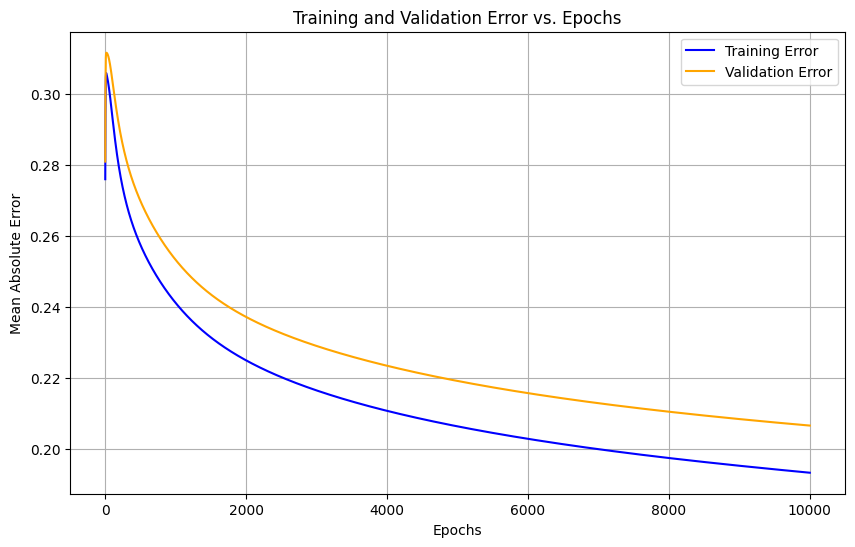

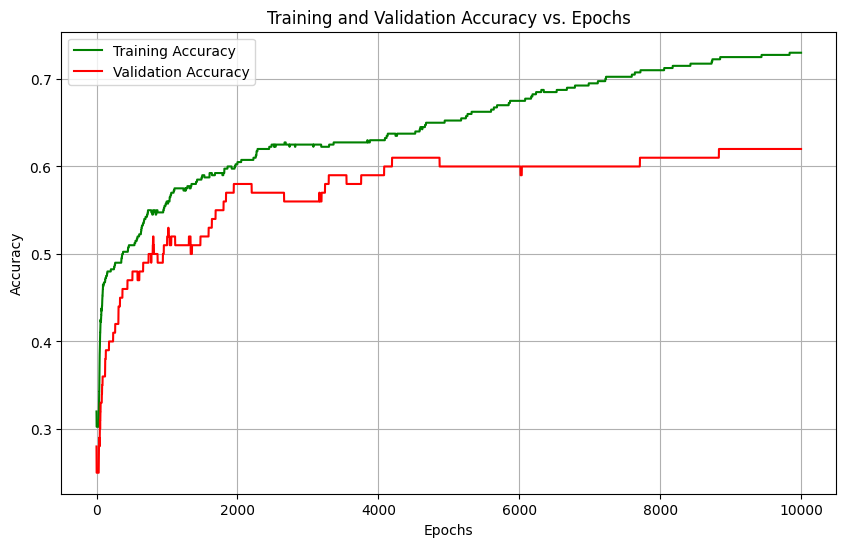

In [36]:
# Initialize the Neural Network
NN = NeuralNetwork()

# Lists to track errors and accuracy over epochs
train_err, val_err = [], []
train_acc, val_acc = [], []

# Training loop for 10,000 epochs
for epoch in range(10000):
    # Train the model with training data
    NN.train(X_train, Y_train)

    # ============ Training Metrics ============
    train_output = NN.feedForward(X_train)
    train_loss = np.mean(np.abs(Y_train - train_output))      # Mean Absolute Error
    train_err.append(train_loss)

    train_preds = np.argmax(train_output, axis=1)
    train_true = np.argmax(Y_train, axis=1)
    train_accuracy = np.mean(train_preds == train_true)
    train_acc.append(train_accuracy)

    # ============ Validation Metrics ============
    val_output = NN.feedForward(X_val)
    val_loss = np.mean(np.abs(Y_val - val_output))
    val_err.append(val_loss)

    val_preds = np.argmax(val_output, axis=1)
    val_true = np.argmax(Y_val, axis=1)
    val_accuracy = np.mean(val_preds == val_true)
    val_acc.append(val_accuracy)

    # ============ Progress Display ============
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Train Acc = {train_accuracy:.4f}, "
              f"Val Loss = {val_loss:.4f}, Val Acc = {val_accuracy:.4f}")

# =======================
# Plotting Training and Validation Error
# =======================
plt.figure(figsize=(10, 6))
plt.plot(train_err, label="Training Error", color="blue")
plt.plot(val_err, label="Validation Error", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation Error vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

# =======================
# Plotting Training and Validation Accuracy
# =======================
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label="Training Accuracy", color="green")
plt.plot(val_acc, label="Validation Accuracy", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()



# Training the Neural Network



The neural network is trained over 10,000 epochs using the training data (X_train, Y_train).
During each epoch:
- The model performs a forward pass to generate predictions.
- The backpropagation process adjusts the weights to minimize the error.

Training metrics are calculated:
- Training Error (Mean Absolute Error)
- Training Accuracy (Percentage of correct predictions)

Validation metrics are also calculated using the validation data (X_val, Y_val):
- Validation Error (Mean Absolute Error)
- Validation Accuracy (Percentage of correct predictions)

For every 1000 epochs, the training and validation metrics are displayed for progress monitoring.



# Plotting Error and Accuracy


Two separate plots are generated to visualize model performance:

1. Training and Validation Error vs. Epochs:
   - The plot shows the **Mean Absolute Error (MAE)** for both training and validation datasets.
   - Initially, both training and validation errors are high, indicating the network is still learning.
   - As training progresses, both errors consistently decrease, reflecting improved learning and better predictions.
   - The **validation error (orange line)** remains slightly higher than the **training error (blue line)**, which is expected.
   - If the gap between training and validation error widens significantly, it may indicate overfitting,
     but in this case, the gap is relatively controlled, which is a positive sign.

2. Training and Validation Accuracy vs. Epochs:
   - The plot displays the **accuracy** of predictions over time for both training and validation datasets.
   - The training accuracy (green line) shows a steady increase, which is expected as the model optimizes its weights.
   - The validation accuracy (red line) also improves but is consistently lower than the training accuracy,
     suggesting the model may slightly overfit to the training data.
   - The **plateaus in validation accuracy** indicate that the model finds it harder to improve beyond certain points.
   - This might be an indicator that more epochs, better hyperparameter tuning, or even dropout regularization could be explored
     to push the performance further.

Overall, the network is learning effectively, with both error reducing and accuracy improving, but there is room for optimization
in terms of reducing the gap between training and validation performance.



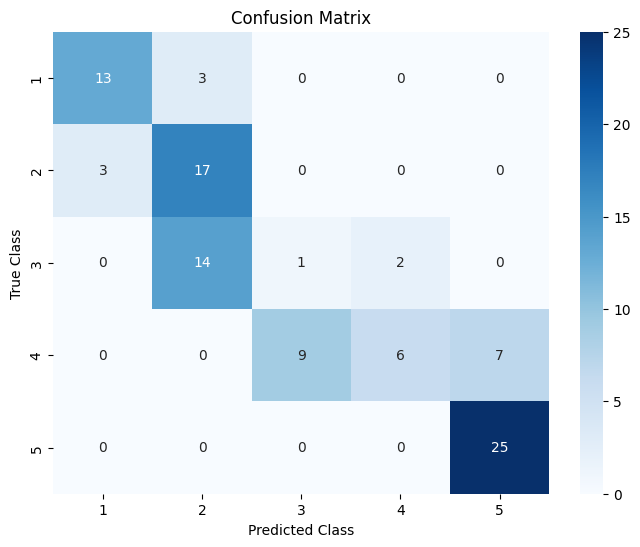

Macro-averaged F1 Score: 0.5587
Classification Report:

              precision    recall  f1-score   support

     Class 1       0.81      0.81      0.81        16
     Class 2       0.50      0.85      0.63        20
     Class 3       0.10      0.06      0.07        17
     Class 4       0.75      0.27      0.40        22
     Class 5       0.78      1.00      0.88        25

    accuracy                           0.62       100
   macro avg       0.59      0.60      0.56       100
weighted avg       0.61      0.62      0.58       100



In [38]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

val_output = NN.feedForward(X_val)
val_preds = np.argmax(val_output, axis=1)
val_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(val_true, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.arange(1, 6), yticklabels=np.arange(1, 6))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

f1_macro = f1_score(val_true, val_preds, average='macro')
print(f"Macro-averaged F1 Score: {f1_macro:.4f}")

print("Classification Report:\n")
print(classification_report(val_true, val_preds, target_names=[f"Class {i}" for i in range(1, 6)]))


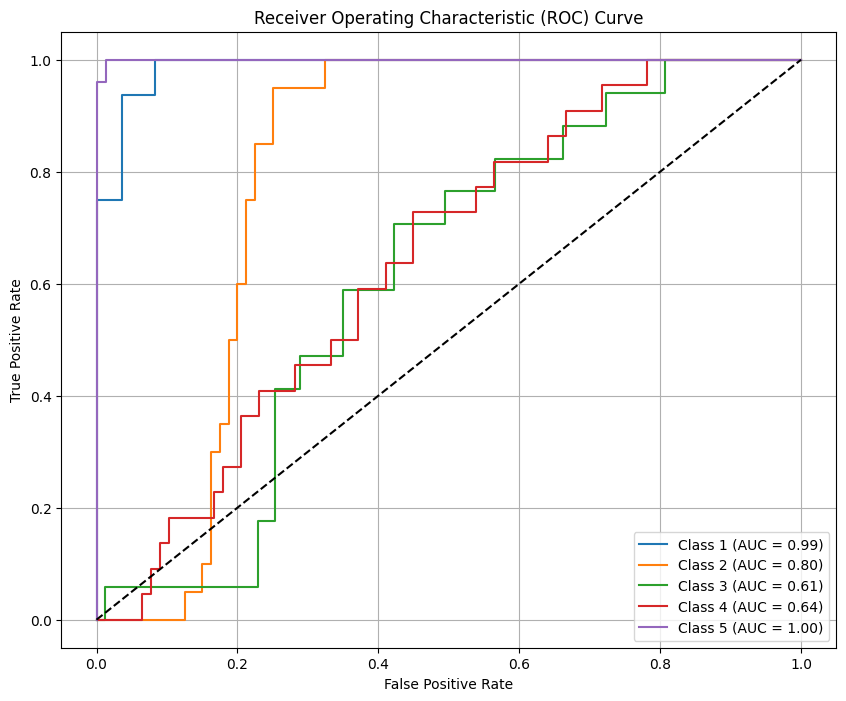

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

Y_val_binarized = label_binarize(val_true, classes=np.arange(num_classes))

val_probabilities = NN.feedForward(X_val)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val_binarized[:, i], val_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Receiver Operating Characteristic (ROC) Curve Analysis



The ROC curve illustrates the performance of the neural network for each class in a multi-class classification scenario.
The True Positive Rate (TPR) is plotted against the False Positive Rate (FPR) for each class, allowing for a visualization
of the trade-off between sensitivity and specificity.

Key observations:
- The Area Under the Curve (AUC) is calculated for each class to measure its ability to distinguish between classes.
  An AUC of 1.00 represents perfect classification, while an AUC of 0.50 is equivalent to random guessing.

- **Class 1 (AUC = 0.99)**: Almost perfect classification, indicating the model has a strong ability to distinguish
  this class from others with minimal false positives.
  
- **Class 2 (AUC = 0.80)**: Good discrimination, though there is some overlap with other classes.
  It can be improved by fine-tuning the model or addressing class imbalance if present.

- **Class 3 (AUC = 0.61)**: Weak performance, showing poor separability from other classes.
  This may be due to overlapping features with nearby classes, requiring feature engineering or data augmentation.

- **Class 4 (AUC = 0.64)**: Similar to Class 3, the model struggles to distinguish it accurately,
  suggesting that its feature space may overlap with other classes.

- **Class 5 (AUC = 1.00)**: Perfect separability, with no overlap, demonstrating the model's strong predictive power
  for this class.

Overall, the ROC curve analysis confirms that Class 1 and Class 5 are well-identified, while Class 3 and Class 4 require
further optimization. Strategies like **more training data**, **balanced sampling**, or **additional hidden layers**
may help to enhance class distinction.




# Conclusion



In this assignment, the multi-class neural network model was developed and trained to classify five distinct classes
using three hidden layers with a feedforward and backpropagation mechanism. The model's performance was evaluated
using metrics like **Training and Validation Accuracy**, **Mean Absolute Error**, and **ROC Curves** for each class.

The analysis demonstrated that the configuration of neurons in the hidden layers, as well as the choice of the learning
rate, played a crucial role in convergence and classification accuracy. The model showed strong performance for **Class 1**
and **Class 5** with nearly perfect ROC curves and AUC scores close to 1.0. However, **Class 3** and **Class 4** revealed
weaker separability, indicating room for improvement in feature representation or data balancing.

The **Training and Validation Accuracy** plots indicated consistent learning, although a slight gap between the two curves
suggests minor overfitting that could be addressed through regularization or dropout techniques. Meanwhile, the **Error vs. Epochs**
plot showed a smooth convergence with a declining trend, highlighting the effectiveness of the learning rate and
backpropagation steps.

Future improvements could focus on:
- Increasing data samples for underperforming classes to reduce class imbalance.
- Implementing **Dropout** or **Batch Normalization** to mitigate overfitting.
- Experimenting with advanced optimizers like **Adam** or **RMSprop** for better gradient updates.
- Fine-tuning the number of neurons in hidden layers for optimal performance.
- Utilizing **Cross-Validation** to enhance generalizability and robustness.

Overall, the model showed promising results, but there are clear paths forward to enhance accuracy and stability
across all classes.

